    max_depth  min_samples_split  train_acc  test_acc
0         2.0                  2   0.804775  0.759777
1         2.0                  5   0.804775  0.759777
2         2.0                 10   0.804775  0.759777
3         2.0                 20   0.804775  0.759777
4         4.0                  2   0.841292  0.787709
5         4.0                  5   0.839888  0.793296
6         4.0                 10   0.839888  0.793296
7         4.0                 20   0.838483  0.770950
8         6.0                  2   0.886236  0.798883
9         6.0                  5   0.882022  0.782123
10        6.0                 10   0.879213  0.782123
11        6.0                 20   0.866573  0.787709
12        8.0                  2   0.914326  0.804469
13        8.0                  5   0.911517  0.821229
14        8.0                 10   0.900281  0.798883
15        8.0                 20   0.879213  0.776536
16       10.0                  2   0.938202  0.804469
17       10.0               

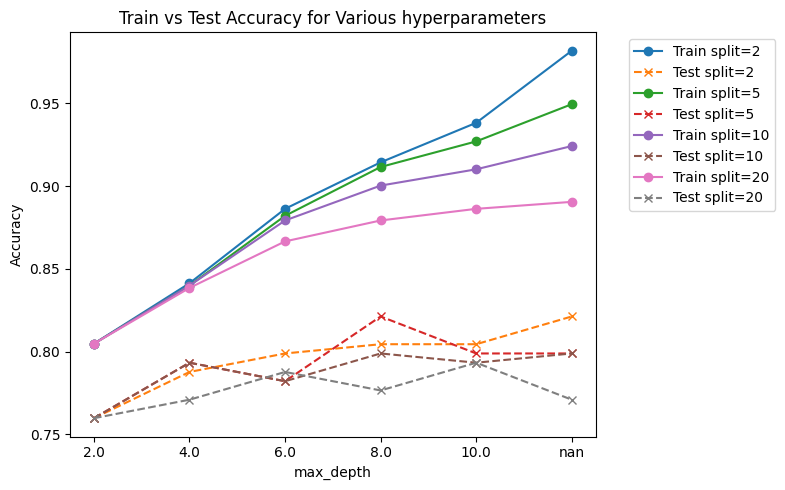

In [6]:
# Task 6: Model Tuning on Cleaned Titanic Dataset
# Dataset: Cleaned Titanic dataset (train_cleaned.csv)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load cleaned dataset
titanic = pd.read_csv('train.csv')

# 2. Features and target
target = 'Survived'
features = [col for col in titanic.columns if col != target]
X = titanic[features]
y = titanic[target]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Hyperparameter tuning ranges
depths = [2, 4, 6, 8, 10, None]
splits = [2, 5, 10, 20]

# 5. Evaluate combinations
results = []
for max_d in depths:
    for min_split in splits:
        dt = DecisionTreeClassifier(max_depth=max_d, min_samples_split=min_split, random_state=42)
        dt.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, dt.predict(X_train))
        test_acc = accuracy_score(y_test, dt.predict(X_test))
        results.append({
            'max_depth': max_d,
            'min_samples_split': min_split,
            'train_acc': train_acc,
            'test_acc': test_acc
        })

# 6. Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# 7. Plot training vs testing accuracy for each min_samples_split
plt.figure(figsize=(8, 5))
for split in splits:
    subset = results_df[results_df['min_samples_split'] == split]
    plt.plot(
        [str(d) for d in subset['max_depth']],
        subset['train_acc'], marker='o', label=f"Train split={split}"
    )
    plt.plot(
        [str(d) for d in subset['max_depth']],
        subset['test_acc'], marker='x', linestyle='--', label=f"Test split={split}"
    )

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Various hyperparameters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

